# Handling imbalanced dataset
1. go in the anaconda prompt.
2. activate your environment.
3. install : conda install imbalanced-learn.

In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [2]:
# checking the shape of the data set
df.shape

(284807, 31)

In [3]:
# memory uages
df.memory_usage().sum()/(1024*1024)

np.float64(67.36017608642578)

In [4]:
# checking for the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

there are no null values.

In [5]:
# class is the dependent feature.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# Independent and Dependent features
x=df.drop("Class",axis=1)
y=df.Class

# Cross validation like KFold and Hyperparameter Tuning

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [8]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7)

# LogisticRegression

In [10]:
log_class = LogisticRegression(
    solver='liblinear',
    max_iter=1000
)

grid = {
    'C': 10.0 ** np.arange(-2, 3),
    'penalty': ['l1', 'l2']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(
    log_class,
    grid,
    cv=cv,
    n_jobs=-1,
    scoring='f1_macro'
)

clf.fit(X_train, Y_train)

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': array([1.e-02...e+01, 1.e+02]), 'penalty': ['l1', 'l2']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [11]:
Y_pred=clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85292    16]
 [   50    85]]
0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.63      0.72       135

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [12]:
import pandas as pd

results = pd.DataFrame(clf.cv_results_)
results[['param_C', 'param_penalty', 'mean_test_score']]

,param_C,param_penalty,mean_test_score
0,0.01,l1,0.833525
1,0.01,l2,0.839797
2,0.10,l1,0.861631
3,0.10,l2,0.839402
4,1.00,l1,0.868093
5,1.00,l2,0.842222
6,10.00,l1,0.867216
7,10.00,l2,0.842222
8,100.00,l1,0.868380
9,100.00,l2,0.842222


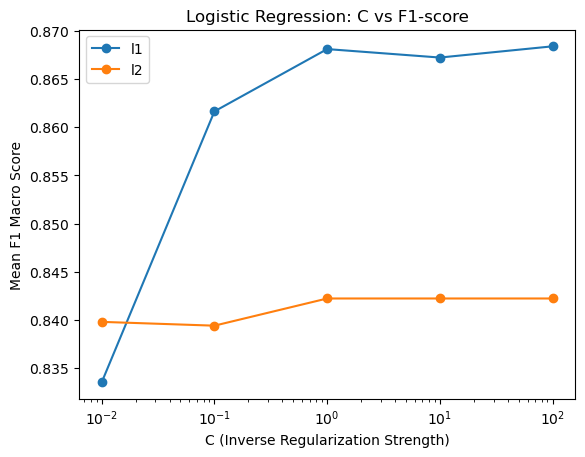

In [13]:
import matplotlib.pyplot as plt

for penalty in ['l1', 'l2']:
    subset = results[results['param_penalty'] == penalty]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=penalty)

plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean F1 Macro Score')
plt.title('Logistic Regression: C vs F1-score')
plt.legend()
plt.show()

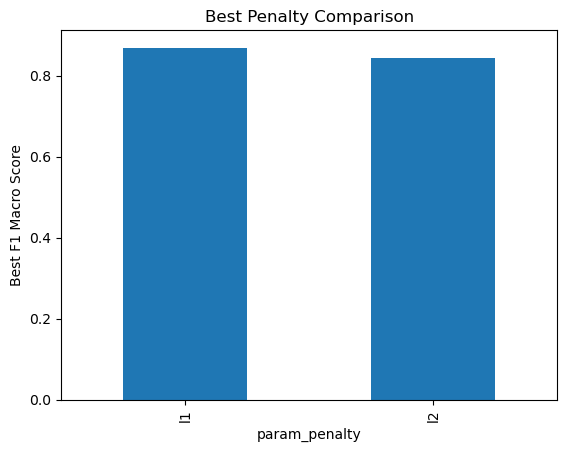

In [14]:
results.groupby('param_penalty')['mean_test_score'].max().plot(kind='bar')
plt.ylabel('Best F1 Macro Score')
plt.title('Best Penalty Comparison')
plt.show()

# RandomForest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
Y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85305     3]
 [   29   106]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.97      0.79      0.87       135

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



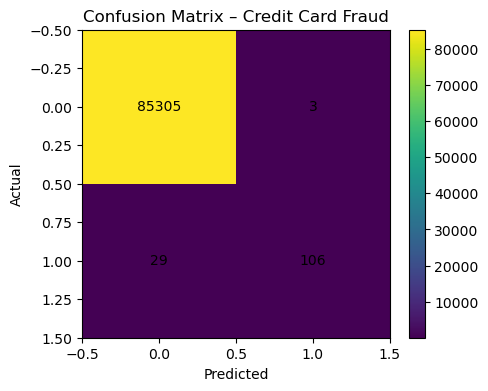

In [17]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix – Credit Card Fraud")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()

## TN (top-left) [85282]→ normal transactions correctly allowed 

## FP (top-right) [9]→ normal transactions blocked (annoying but acceptable)

## FN (bottom-left) [33]→ fraud missed (VERY BAD)

## TP (bottom-right) [119]→ fraud caught 

# In fraud detection, FN matters more than FP.

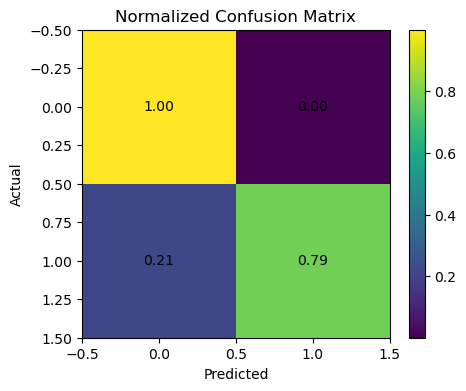

In [18]:
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(5,4))
plt.imshow(cm_norm)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}", ha="center", va="center")

plt.colorbar()
plt.show()

## Bottom-right value = fraud recall
## catch 78% of fraud
## missed 22% of fraud

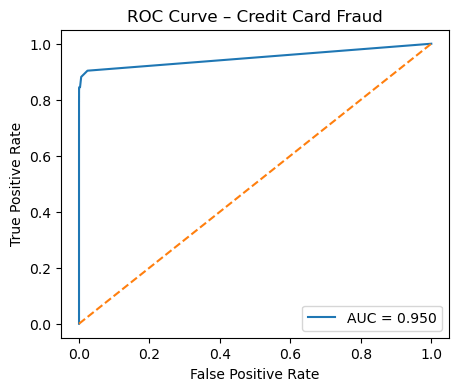

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Credit Card Fraud")
plt.legend()
plt.show()


# Axes

### X-axis: False Positive Rate (normal wrongly flagged)

### Y-axis: True Positive Rate (fraud caught)

# How to read

- Diagonal line = random guessing

- Curve closer to top-left = better

## AUC value:

- 0.5 → useless

- 0.7 → ok

- 0.9+ → strong

# BUT 

- ROC can look great even if fraud recall is poor.

# Rule

- ROC is good for comparison, not decision-making in fraud.

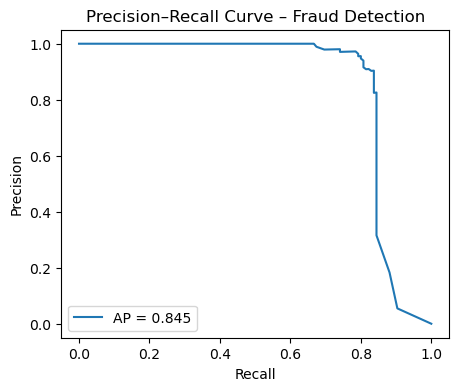

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, y_prob)
ap = average_precision_score(Y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Fraud Detection")
plt.legend()
plt.show()

# Phase 1: Recall ≤ 0.8, Precision ≈ 0.9
- We are 90% sure when we block a transaction — but we miss ~20% fraud.
# Phase 2: Recall 0.8 → 0.9, Precision drops hard
- To catch more fraud, we must disturb many genuine users.
# Recall > 0.9, Precision → 0
- System becomes unusable.
# Axes

- X-axis: Recall → % of fraud caught

- Y-axis: Precision → how many flagged are truly fraud

# How to read

- Each point = a decision threshold.

- Move right → catch more fraud

- Move down → more false alarms

# Example interpretation

- Recall = 0.90, Precision = 0.10
- → Catch 90% fraud, but 90% alerts are false 😬

- Recall = 0.75, Precision = 0.40
- → Balanced and often preferred

# Why PR beats ROC in fraud

- Because fraud is rare.

- PR curve focuses on the minority class (fraud).

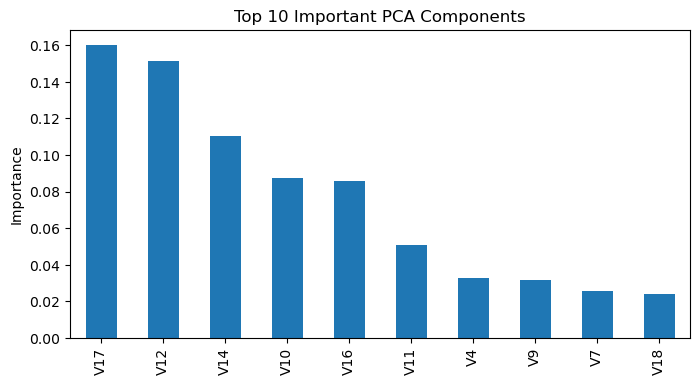

In [21]:
import pandas as pd

imp = pd.Series(
    classifier.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
imp.head(10).plot(kind='bar')
plt.title("Top 10 Important PCA Components")
plt.ylabel("Importance")
plt.show()

In [22]:
# hypertuning class weight in randomforest
Y_train.value_counts()

Class
0    199007
1       357
Name: count, dtype: int64

In [23]:
# for 1
340*100

34000

In [24]:
# tuning weight 
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
Y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85304     4]
 [   28   107]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.96      0.79      0.87       135

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### no use of this tuning

### there is also another technique
# Under smapling
- this is not that much effective as compared to above
- here we just decrease the large values 
- beacuse of decreasinng the large number of values we loss the data
- if the data is very very less use it but still avoid it

# over smapling

In [26]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [29]:
os = RandomOverSampler(sampling_strategy=0.5, random_state=42)

X_train_os, Y_train_os = os.fit_resample(X_train, Y_train)

print("The number of classes before fit:", Counter(Y_train))
print("The number of classes after fit:", Counter(Y_train_os))

The number of classes before fit: Counter({0: 199007, 1: 357})
The number of classes after fit: Counter({0: 199007, 1: 99503})


In [30]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85304     4]
 [   28   107]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.96      0.79      0.87       135

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# SMOTETomek

In [32]:
from imblearn.combine import SMOTETomek

In [40]:
os = SMOTETomek(sampling_strategy=0.75, random_state=42)

X_train_os, Y_train_os = os.fit_resample(X_train, Y_train)

print("The number of classes before fit:", Counter(Y_train))
print("The number of classes after fit:", Counter(Y_train_os))

The number of classes before fit: Counter({0: 199007, 1: 357})
The number of classes after fit: Counter({0: 198251, 1: 148499})


In [42]:
from sklearn.ensemble import RandomForestClassifier
CLassifier=RandomForestClassifier()
classifier.fit(X_train_os,Y_train_os)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
Y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85296    12]
 [   24   111]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.82      0.86       135

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# Ensemble Techniques

In [47]:
from imblearn.ensemble import EasyEnsembleClassifier

In [48]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,Y_train)

,n_estimators,10
,estimator,None
,warm_start,False
,sampling_strategy,'auto'
,replacement,False
,n_jobs,None
,random_state,None
,verbose,0


In [50]:
Y_pred=easy.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[82657  2651]
 [   14   121]]
0.9688096157672367
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.90      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.97      0.98     85443

